In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# load the source data for each panel 
eng_phon_names = pd.read_excel('./figure_E10_sourcedata.xlsx',engine='openpyxl',sheet_name='Panel_a',index_col=0).values.squeeze()
eng_phon_letters = pd.read_excel('./figure_E10_sourcedata.xlsx',engine='openpyxl',sheet_name='Panel_b',index_col=0).values.squeeze()
eng_all = pd.read_excel('./figure_E10_sourcedata.xlsx',engine='openpyxl',sheet_name='Panel_c',index_col=0).values.squeeze()
spa_phon_names = pd.read_excel('./figure_E10_sourcedata.xlsx',engine='openpyxl',sheet_name='Panel_d',index_col=0).values.squeeze()
spa_phon_letters = pd.read_excel('./figure_E10_sourcedata.xlsx',engine='openpyxl',sheet_name='Panel_e',index_col=0).values.squeeze()
spa_all = pd.read_excel('./figure_E10_sourcedata.xlsx',engine='openpyxl',sheet_name='Panel_f',index_col=0).values.squeeze()

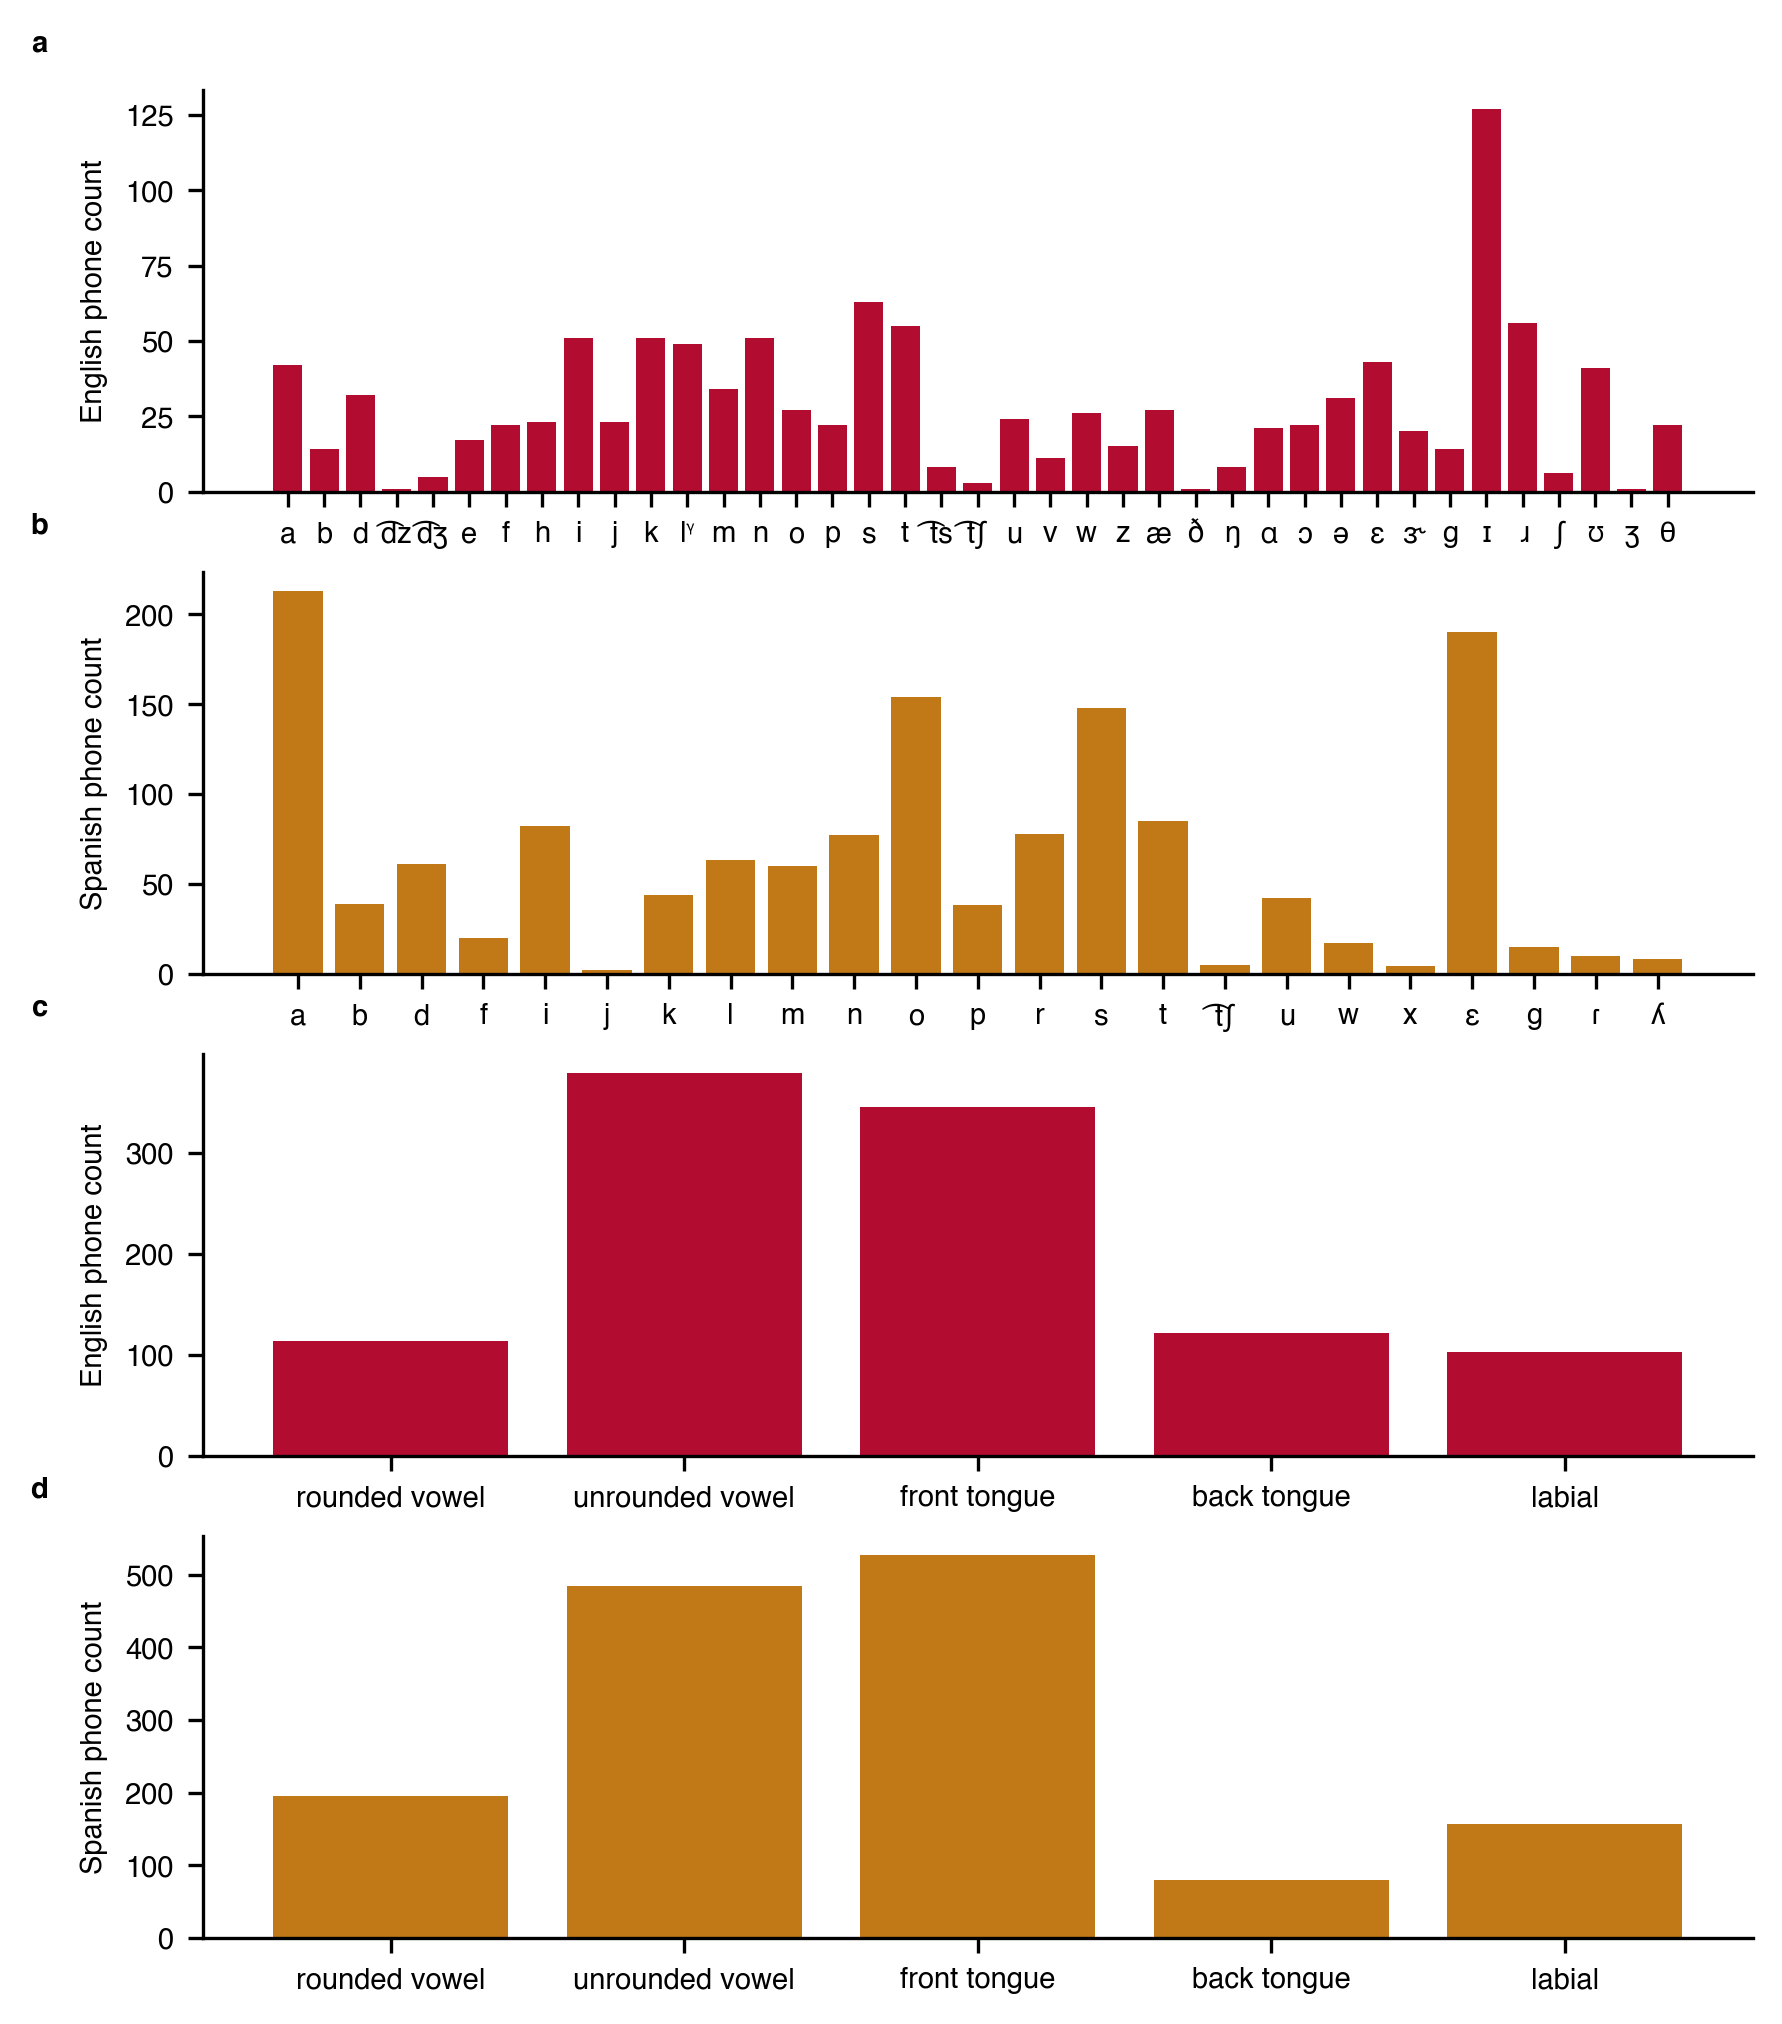

In [6]:
import numpy as np
import seaborn as sns
font = {'family' : 'Helvetica',
        'size'   : 7}
import matplotlib as mpl
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

mpl.rc('font', **font)

pal = sns.color_palette('deep').as_hex()
pal = ['#b20d30','#c17817']
fig, axs = plt.subplots(4,1,figsize=(10/1.5,12/1.5),dpi=300) # 10,15

labs,cnts = np.unique(eng_phon_letters,return_counts=True)
axs[0].bar(labs,cnts,color=pal[0])
axs[0].set_ylabel('English phone count')
axs[0].text(-0.1, 1.15, 'a', transform=axs[0].transAxes,
  fontsize=font['size'], fontweight='bold', va='top', ha='right')


labs,cnts = np.unique(spa_phon_letters,return_counts=True)
axs[1].bar(labs,cnts,color=pal[1])
axs[1].set_ylabel('Spanish phone count')
axs[1].text(-0.1, 1.15, 'b', transform=axs[1].transAxes,
  fontsize=font['size'], fontweight='bold', va='top', ha='right')


poas = {'rounded vowel':0,'unrounded vowel':0,'front tongue':0,'back tongue':0
        ,'labial':0}
for phon in eng_phon_names:
    if('unrounded' in phon):
        poas['unrounded vowel'] += 1 
    elif('rounded' in phon):
        poas['rounded vowel'] += 1 
    elif('alveolar' in phon):
        poas['front tongue'] += 1 
    elif('velar' in phon or 'glottal' in phon):
        poas['back tongue'] += 1    
    elif('labial' in phon or 'labio' in phon):
        poas['labial'] += 1
labs,cnts = np.unique(eng_phon_names,return_counts=True)
#plt.bar(labs,cnts)
axs[2].bar(poas.keys(),poas.values(),color=pal[0])
axs[2].set_ylabel('English phone count')
#axs[0].set_xticklabels(poas.keys(),rotation=45)
axs[2].text(-0.1, 1.15, 'c', transform=axs[2].transAxes,
  fontsize=font['size'], fontweight='bold', va='top', ha='right')



poas = {'rounded vowel':0,'unrounded vowel':0,'front tongue':0,'back tongue':0
        ,'labial':0}
for phon in spa_phon_names:
    if('unrounded' in phon):
        poas['unrounded vowel'] += 1 
    elif('rounded' in phon):
        poas['rounded vowel'] += 1 
    elif('alveolar' in phon):
        poas['front tongue'] += 1 
    elif('velar' in phon or 'glottal' in phon):
        poas['back tongue'] += 1    
    elif('labial' in phon or 'labio' in phon):
        poas['labial'] += 1
labs,cnts = np.unique(eng_phon_names,return_counts=True)
#plt.bar(labs,cnts)
axs[3].bar(poas.keys(),poas.values(),color=pal[1])
axs[3].set_ylabel('Spanish phone count')
axs[3].text(-0.1, 1.15, 'd', transform=axs[3].transAxes,
  fontsize=font['size'], fontweight='bold', va='top', ha='right')

#axs[1].set_xticklabels(poas.keys(),rotation=45)
plt.savefig('./figure_E10.jpg',dpi=300,bbox_inches='tight')
plt.show()